In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import warnings
import glob
import sys
import os
# Input data files are available in the read-only "../input/" directory
warnings.filterwarnings("ignore")
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# We load the dataset into pandas dataframes

df = pd.read_csv('/kaggle/input/data/Data_Entry_2017.csv', delimiter=',')

# An exploratory analysis of the NIH chest x-ray dataset.

We will use some exploratory functions to see what this data looks like
head(), describe().

In [3]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [4]:
df.describe()

,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,0.0
mean,8.573751,14346.381743,46.901463,2646.078844,2486.438842,0.155649,0.155649,NaN
std,15.406320,8403.876972,16.839923,341.246429,401.268227,0.016174,0.016174,NaN
min,0.000000,1.000000,1.000000,1143.000000,966.000000,0.115000,0.115000,NaN
25%,0.000000,7310.750000,35.000000,2500.000000,2048.000000,0.143000,0.143000,NaN
50%,3.000000,13993.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000,NaN
75%,10.000000,20673.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000,NaN
max,183.000000,30805.000000,414.000000,3827.000000,4715.000000,0.198800,0.198800,NaN


# Data cleaning and preprocessing

In [5]:
# Split the 'Findings' column into separate conditions
df['Conditions'] = df['Finding Labels'].str.split('|')

# This will give you a new column 'Conditions' where each entry is a list of conditions

df['Num Conditions'] = df['Conditions'].apply(len)

df_exploded = df.explode('Conditions')

In [6]:
# Split the 'Finding Labels' column into separate conditions
df['Conditions'] = df['Finding Labels'].str.split('|')

# Convert the list of conditions to a string
df['Conditions'] = df['Conditions'].apply(lambda x: ' '.join(x))

# Create dummy variables for each condition
condition_dummies = df['Conditions'].str.get_dummies(sep=' ')

# Concatenate the original DataFrame with the dummy DataFrame
df = pd.concat([df, condition_dummies], axis=1)

When we display the dataframe we can see that the conditions are listed in the column 'Finding Label' which we can extract.

In [7]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Fibrosis,Finding,Hernia,Infiltration,Mass,No,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,0,0,0,0,0,0,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0,1,0,0,0,1,0,0,0,0
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0,0,1,0,0,0,0,0,0,0


In [8]:
# Select relevant columns
df = df[['Image Index','Finding Labels','Follow-up #','Patient ID','Patient Age','Patient Gender']]

# Make sure the labels are of the string type
df['Finding Labels'] = df['Finding Labels'].astype(str)

# Split the labels into the different conditions
df['Finding Labels'] = df['Finding Labels'].str.split('|')

# The list of conditions
pathology_list = ['No Finding','Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']

# Create new columns for each disease
for pathology in pathology_list:
    df[pathology] = df['Finding Labels'].apply(lambda x: int(pathology in x))

In [9]:
# Drop the 'Finding Labels' column
df = df.drop('Finding Labels', axis=1)

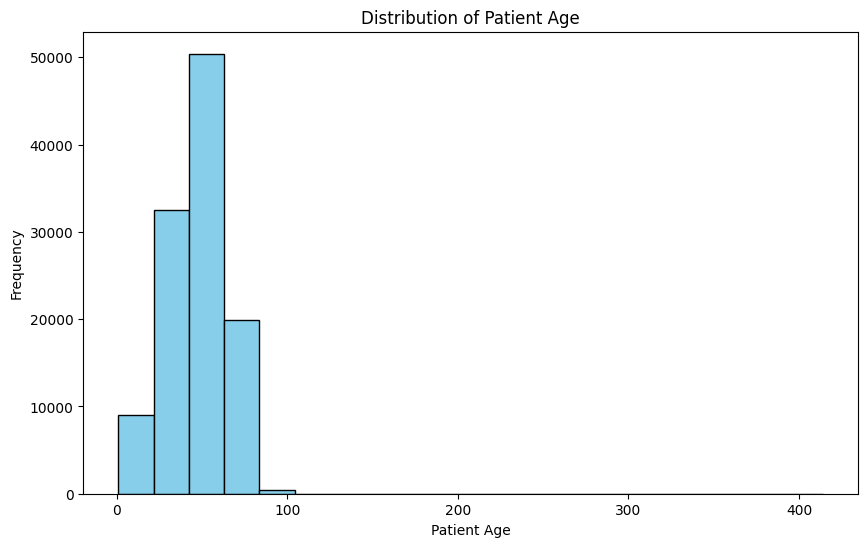

In [10]:
# Create a histogram of the 'Patient Age' column
plt.figure(figsize=(10,6))
plt.hist(df['Patient Age'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Patient Age')
plt.ylabel('Frequency')
plt.title('Distribution of Patient Age')

# Display the plot
plt.show()

We can see that a majority of the patients are between the ages of 0 and 100. There are a few that are above 100 years old and  of those were above the current record of 122 years old. We can look deeper into this and make changes as there is a high chance that those are errors.

In [11]:
# Create a boolean mask for ages greater than 100
mask = df['Patient Age'] > 100

# Use the mask to filter the DataFrame
filtered_df = df[mask]

# Get the number of rows in the filtered DataFrame
num_persons = filtered_df.shape[0]

print(num_persons)

16


In [12]:
# Create a boolean mask for ages less than or equal to 100
mask = df['Patient Age'] <= 100

# Use the mask to filter the DataFrame
df = df[mask]

After removing the patients with ages above the current record of 122 years old, we can visualise the age distribution again.

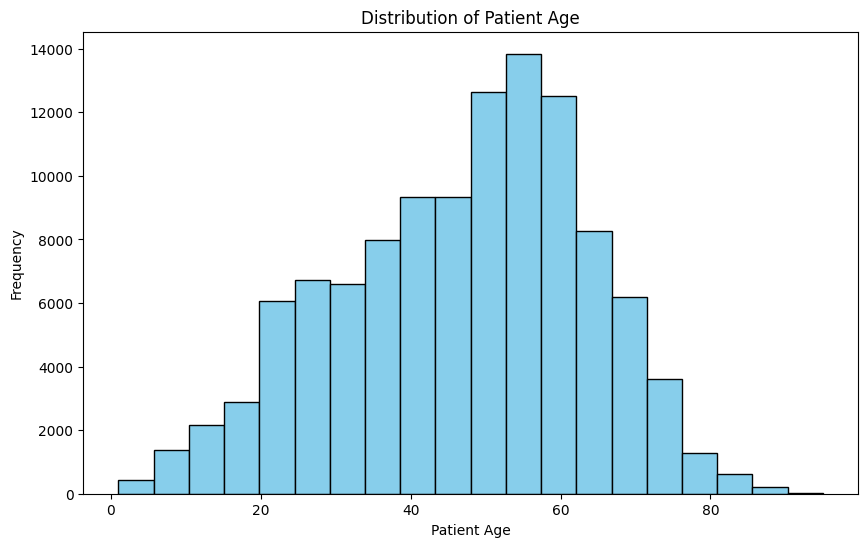

In [13]:
# Create a histogram of the 'Patient Age' column
plt.figure(figsize=(10,6))
plt.hist(df['Patient Age'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Patient Age')
plt.ylabel('Frequency')
plt.title('Distribution of Patient Age')

# Display the plot
plt.show()

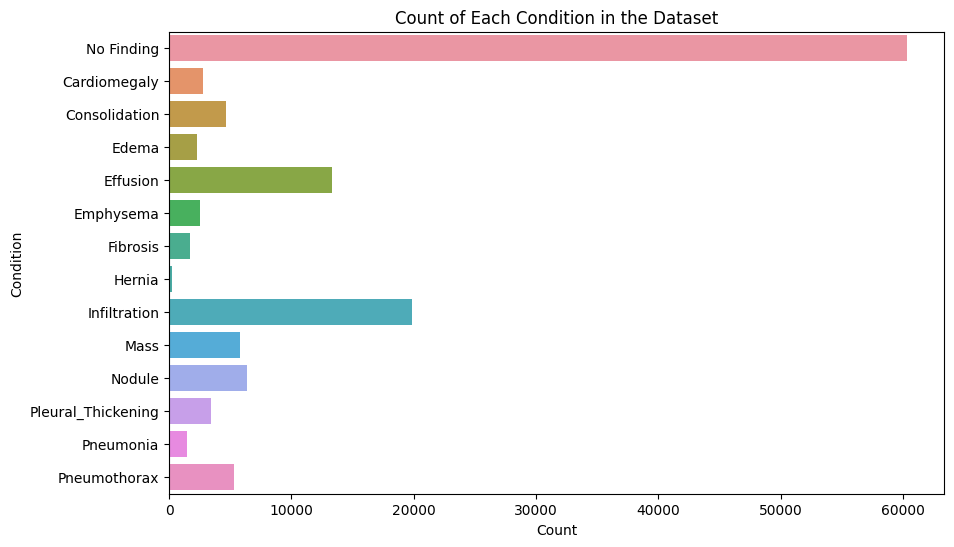

In [14]:
# Set the default palette
sns.set_palette('viridis')

# Create a list to store the counts of each condition
condition_counts = [df[pathology].sum() for pathology in pathology_list]

# Create a DataFrame from the condition counts
data = pd.DataFrame({
    'Condition': pathology_list,
    'Count': condition_counts
})

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(y='Condition', x='Count', data=data)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Condition')
plt.title('Count of Each Condition in the Dataset')

# Display the chart
plt.show()

# Chest x-rays with findings vs no findings.

We can see that approximately 54% of the chest x-rays in this dataset are labelled as having no findings, this can present challenges or learning opportunities depending on what we want to do with our data.
We may want to know what features differentiate those with no findings from those with findings. For machine learning we may want to take measures to ensure having a large number of ‘No Finding’ images does not bias the model towards predicting ‘No Finding'.

For the purpose of data analysis we can take a quick look at the no findings xrays to see what we can learn from those.

In [15]:
# Create age groups
bins = list(range(0, 101, 10))  # Creates bins from 0 to 130 with a step of 10
labels = [f'{i}-{i+9}' for i in range(0, 100, 10)]  # Creates labels for these bins
df['Age Group'] = pd.cut(df['Patient Age'], bins=bins, labels=labels, right=False)

# Calculate % of total per age group
total_patients = df.shape[0]
df_total = df['Age Group'].value_counts().sort_index() / total_patients * 100

# Calculate % of no findings per age group
df_no_findings = df[df['No Finding'] == 1].groupby('Age Group').size() / df.groupby('Age Group').size() * 100

# Combine both series into a dataframe
age_analysis_df = pd.concat([df_total, df_no_findings], axis=1)
age_analysis_df.columns = ['% of Total', '% of No Findings']

# Print the dataframe
print(age_analysis_df)

           % of Total  % of No Findings
Age Group                              
0-9          1.251516         59.871703
10-19        4.835688         58.254935
20-29       11.416185         57.462103
30-39       14.551666         58.413535
40-49       19.384679         55.851088
50-59       24.446942         51.988616
60-69       17.191180         48.988169
70-79        5.923963         47.718717
80-89        0.940198         42.884250
90-99        0.057982         38.461538


We see that there the trend is for the number of x-rays with 'No findings' to decrease with age. About 50.4% of those <10 have no finding dropping off to 28.4% with no findings in the nineties, this is in keeping with what we may expect as health issues tend to increase with age.

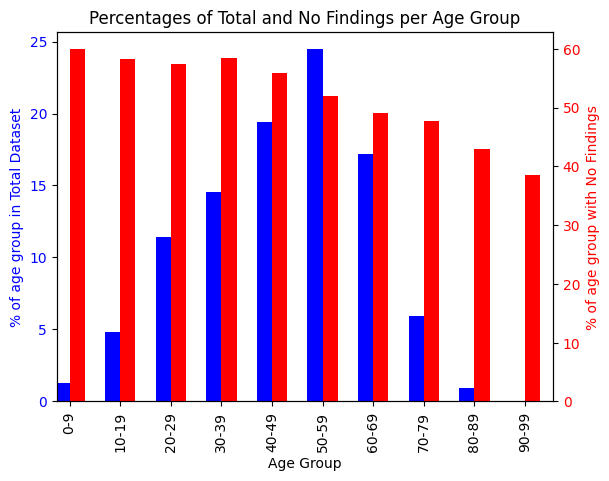

In [16]:
# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Plot % of Total
age_analysis_df['% of Total'].plot(kind='bar', color='blue', ax=ax1, width=0.3, position=1)
ax1.set_ylabel('% of age group in Total Dataset', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for the same plot
ax2 = ax1.twinx()

# Plot % of No Findings on the second y-axis
age_analysis_df['% of No Findings'].plot(kind='bar', color='red', ax=ax2, width=0.3, position=0)
ax2.set_ylabel('% of age group with No Findings', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set the x-axis label
ax1.set_xlabel('Age Group')

# Set the plot title
plt.title('Percentages of Total and No Findings per Age Group')

# Show the plot
plt.show()

**Counterintuitive findings**
A finding in the data that seems counterintuitive is older people and those with positive findings on their x-rays having less follow ups, despite having more illness. There are potential reasons for this:

Data Bias: The data might not be fully representative of the population. It could be biased towards certain age groups or health conditions.

Healthcare Access: Older individuals or those with findings might have less access to healthcare due to mobility issues, financial constraints, or other barriers.

Data Recording: Sometimes, the way data is recorded might lead to a high number of follow-ups. For example, if a patient visits multiple departments in a hospital during a single visit, and each department visit is recorded as a separate follow-up, this could inflate the number of follow-ups.

In [17]:
# Calculate the statistical summary for 'Follow-up #' for each age group
follow_up_summary = df.groupby('Age Group')['Follow-up #'].describe()

# Print the summary
print(follow_up_summary)

             count       mean        std  min  25%  50%   75%    max
Age Group                                                           
0-9         1403.0   7.114754  13.337775  0.0  0.0  1.0   7.0   80.0
10-19       5421.0   8.788046  13.999377  0.0  0.0  3.0  11.0  157.0
20-29      12798.0  10.170574  18.075101  0.0  0.0  3.0  11.0  151.0
30-39      16313.0   8.825783  15.235733  0.0  0.0  3.0  11.0  156.0
40-49      21731.0   7.827389  13.920925  0.0  0.0  3.0   9.0  142.0
50-59      27406.0   9.112895  17.577098  0.0  0.0  3.0  10.0  183.0
60-69      19272.0   7.872042  12.849892  0.0  0.0  3.0   9.0  113.0
70-79       6641.0   7.657883  13.958591  0.0  0.0  3.0   8.0  118.0
80-89       1054.0   6.272296   9.555300  0.0  0.0  2.0   8.0   54.0
90-99         65.0   6.415385   6.573841  0.0  1.0  5.0  11.0   23.0


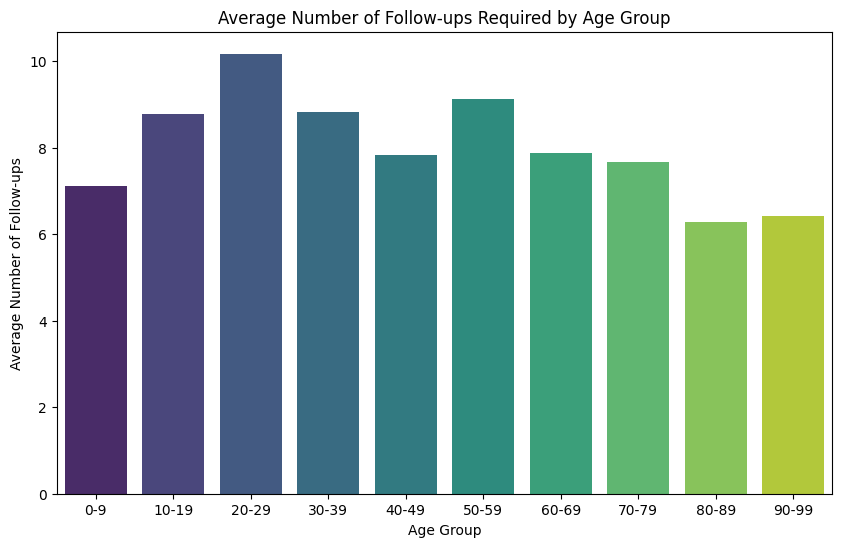

In [18]:
# Calculate the average number of follow-ups for each age group
average_follow_ups = df.groupby('Age Group')['Follow-up #'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Follow-up #', data=average_follow_ups, palette='viridis')

# Set the plot title and labels
plt.title('Average Number of Follow-ups Required by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Number of Follow-ups')

# Show the plot
plt.show()

In [19]:
# Create a new column 'Findings'
df['Findings'] = df['No Finding'].apply(lambda x: 'No' if x == 0 else 'Yes')

# Calculate the number of follow-ups for each group
follow_up_counts = df.groupby('Findings')['Follow-up #'].count()

# Calculate the percentage of follow-ups for each group
follow_up_percentages = follow_up_counts / df.shape[0] * 100

# Print the number and percentage of follow-ups for each group
print("Number of Follow-ups:")
print(follow_up_counts)
print("\nPercentage of Follow-ups:")
print(follow_up_percentages)

Number of Follow-ups:
Findings
No     51751
Yes    60353
Name: Follow-up #, dtype: int64

Percentage of Follow-ups:
Findings
No     46.163384
Yes    53.836616
Name: Follow-up #, dtype: float64


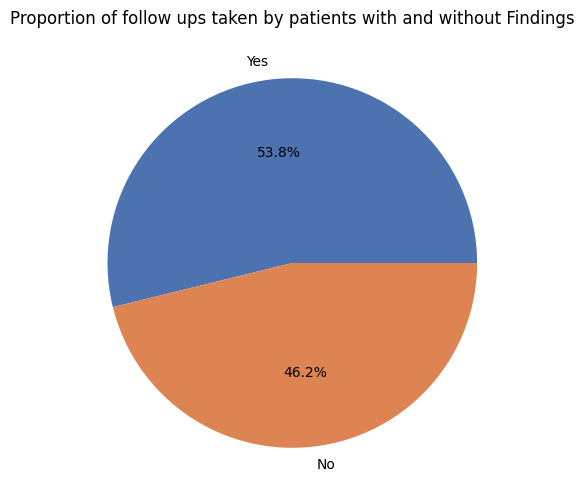

In [20]:
# Remove previous chart color scheme
sns.set_palette('deep')

# Calculate the number of patients with and without findings
findings_counts = df['Findings'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(findings_counts, labels=findings_counts.index, autopct='%1.1f%%')

# Set the plot title
plt.title('Proportion of follow ups taken by patients with and without Findings')

# Show the plot
plt.show()

**Note:** There is also the issue that a clear chest x-ray does not rule out many illnesses that patients may be dealing with.

Put another way we should make sure we are looking at thing **wholistically** this analysis only looks at chest x-rays, no clinical examinations or other investigations are available to give us a broader picture

### Gender Analysis

In [21]:
gender_analysis = df.groupby('Patient Gender')['No Finding'].mean()
print(gender_analysis)

Patient Gender
F    0.542008
M    0.535561
Name: No Finding, dtype: float64


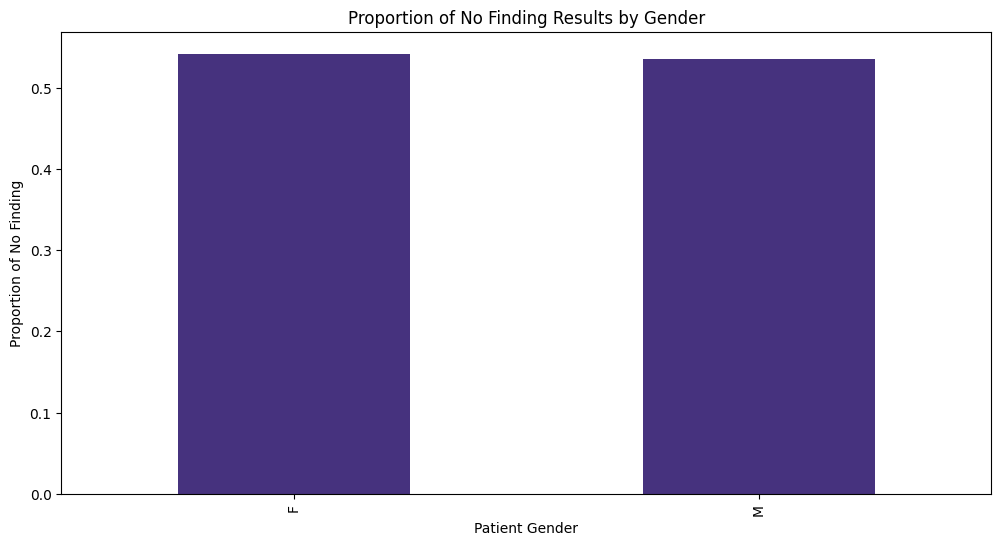

In [22]:
# Set the color palette
sns.set_palette('viridis')

# Create a bar plot
plt.figure(figsize=(12,6))
gender_analysis.plot(kind='bar')

# Set the plot labels and title
plt.xlabel('Patient Gender')
plt.ylabel('Proportion of No Finding')
plt.title('Proportion of No Finding Results by Gender')

# Show the plot
plt.show()

Patient gender doesn't seem to have much on an impact on wether there are findings or not. This may not be surprising information.

# Image Visualisation

An opportunity to see if the data we are using is labelled in accordance with what we know of pathologies on chest x-ray.

In [23]:
%%capture
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) # Will not print (%%captured)
        
# Load the images
root_folder = "/kaggle/input/data/"

# Use glob to get all PNG images from the subfolders
try:
    image_paths = glob.glob(os.path.join(root_folder, "images_*/images/*.png"))
except FileNotFoundError as e:
    print(f"Error: {e}")
    # Handle the error, e.g., provide default paths or exit the program

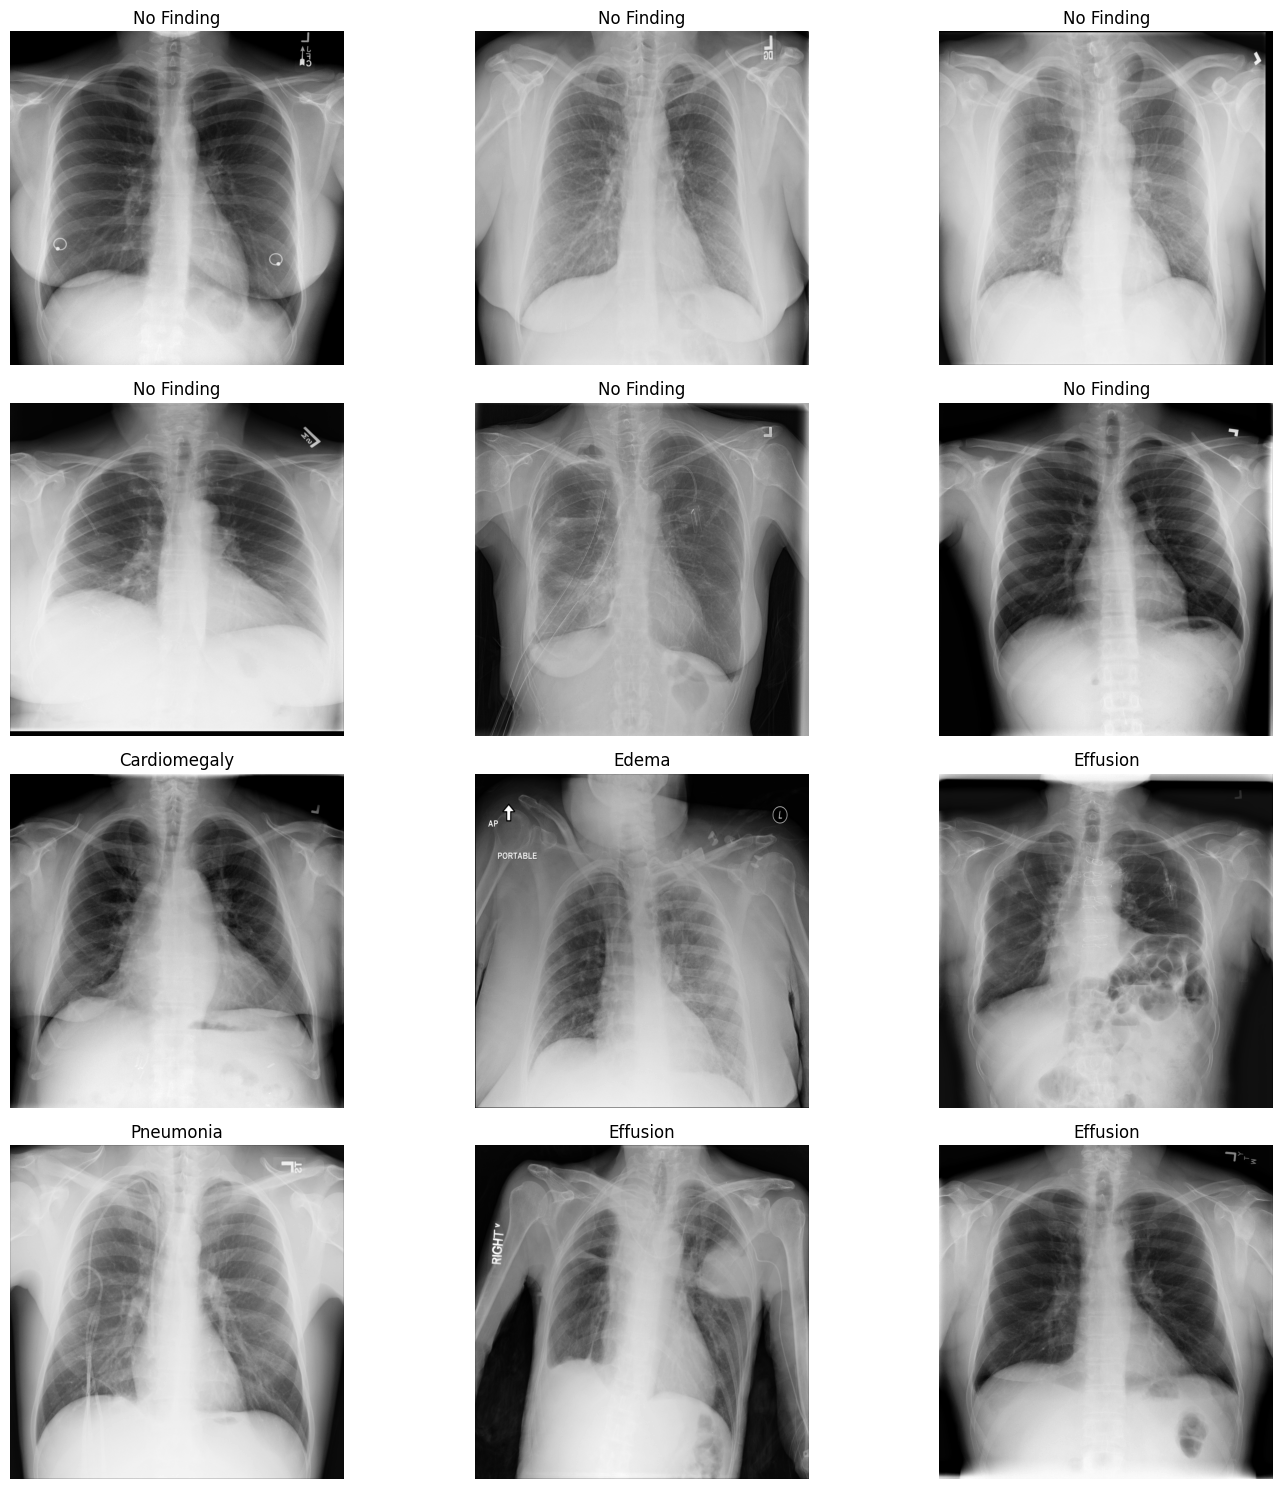

In [24]:
# Select 6 random pathologies
selected_pathologies = np.random.choice(pathology_list[1:], 6, replace=False)  # Exclude 'No Finding'

# Select one image from each selected pathology
other_pathology_images = [df[df[pathology] == 1].sample(1)['Image Index'].values[0] for pathology in selected_pathologies]

# Set aside 6 images from 'No Finding'
no_finding_images = df[df['No Finding'] == 1].sample(6)['Image Index'].values

# Now you have 6 images from 'No Finding' and 1 from each of the 6 selected pathologies
selected_images = list(no_finding_images) + other_pathology_images

image_paths_dict = {os.path.basename(path): path for path in image_paths}

# Create a figure with subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 15))

for i, img_name in enumerate(selected_images):
    # Load the image
    img_path = image_paths_dict[img_name]
    img = mpimg.imread(img_path)
    
    # Find the corresponding pathology
    pathology = df[df['Image Index'] == img_name][pathology_list].idxmax(axis=1).values[0]
    
    # Display the image in a subplot
    ax = axes[i // 3, i % 3]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_title(pathology)

# Remove empty subplots
if len(selected_images) < 12:
    for i in range(len(selected_images), 12):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

# Analysis of chest pathologies

After taking a look at the data for those x-rays with no findings and running some comparison with those that have findings generally. A good next step would be analysing the patterns between those with different conditions.

First we remake the dataframe without the 'No Findings' x-rays.

In [25]:
# Create a new dataframe without 'No Finding'
df = df.drop(['No Finding','Findings'], axis=1)

In [26]:
# List of conditions
conditions_list = ['Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']

# Calculate the number of conditions for each row
num_conditions = df[conditions_list].sum(axis=1)

# Remove patients with 0 conditions
df = df[num_conditions > 0]

# Recalculate the number of conditions for each row
num_conditions = df[conditions_list].sum(axis=1)

# Calculate the number of patients with each number of conditions
condition_counts = num_conditions.value_counts().sort_index()

# Print the number of patients with each number of conditions
print(condition_counts)

1    30883
2    12388
3     3342
4      735
5      162
6       20
7        5
8        2
Name: count, dtype: int64


In [27]:
# List of conditions
conditions_list = ['Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']

# Calculate the number of cases for each condition
num_cases = df[conditions_list].sum()

# Calculate the percentage of total for each condition
percentage_total = df[conditions_list].mean() * 100

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Condition': conditions_list,
    'Number of Cases': num_cases.values,
    'Percentage of Total (%)': percentage_total.values
})

# Set the condition names as the index
results_df.set_index('Condition', inplace=True)

# Print the results
results_df.head(13)

,Number of Cases,Percentage of Total (%)
Condition,,
Cardiomegaly,2776,5.839662
Consolidation,4667,9.817616
Edema,2302,4.842544
Effusion,13316,28.011864
Emphysema,2516,5.292719
Fibrosis,1686,3.546711
Hernia,227,0.477523
Infiltration,19891,41.843196
Mass,5779,12.156846


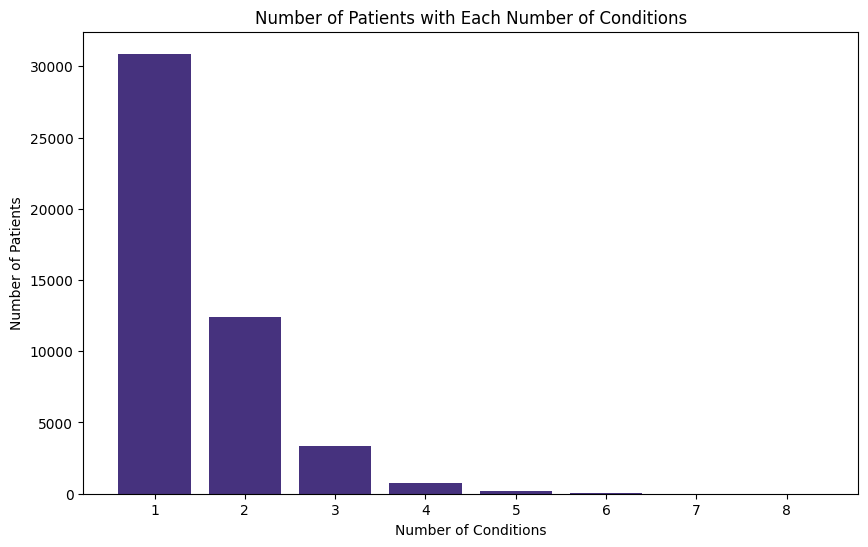

In [28]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(condition_counts.index, condition_counts.values)

# Set the plot title and labels
plt.title('Number of Patients with Each Number of Conditions')
plt.xlabel('Number of Conditions')
plt.ylabel('Number of Patients')

# Show the plot
plt.show()

# Single vs multiple conditions
We can see that some of the patients have more than one finding on the x-ray. This is something we can explore further.

In [29]:
# List of conditions
conditions_list = ['Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']

# Calculate the number of conditions for each patient
df['Num Conditions'] = df[conditions_list].sum(axis=1)

In [30]:
# Create a new column 'Condition Type' that indicates whether a patient has a single condition or multiple conditions
df['Condition Type'] = df['Num Conditions'].apply(lambda x: 'Single' if x == 1 else 'Multiple')

In [31]:
# Calculate the percentage of patients with single and multiple conditions in each age group
condition_type_counts = df.groupby('Age Group')['Condition Type'].value_counts(normalize=True) * 100


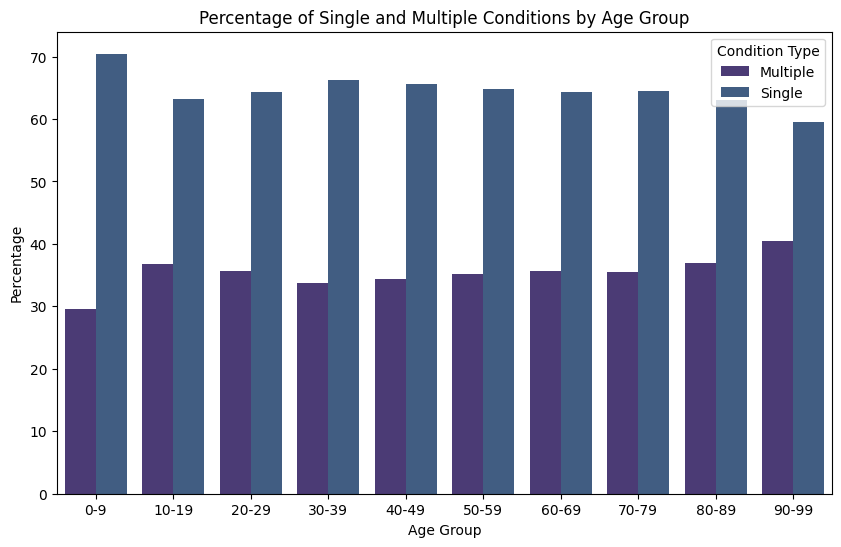

In [32]:
# Create a new column 'Condition Type' that indicates whether a patient has a single condition or multiple conditions
df['Condition Type'] = df['Num Conditions'].apply(lambda x: 'Single' if x == 1 else 'Multiple')

# Calculate the total number of patients in each age group
total_patients = df['Age Group'].value_counts()

# Calculate the number of patients with single and multiple conditions in each age group
condition_counts = df.groupby(['Age Group', 'Condition Type']).size()

# Calculate the percentage of patients with single and multiple conditions in each age group
percentage = condition_counts.div(total_patients, level='Age Group') * 100

# Reset the index of the DataFrame for easier plotting
percentage = percentage.reset_index()
percentage.columns = ['Age Group', 'Condition Type', 'Percentage']

# Create a count plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Percentage', hue='Condition Type', data=percentage)

# Set the plot title and labels
plt.title('Percentage of Single and Multiple Conditions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')

# Show the plot
plt.show()

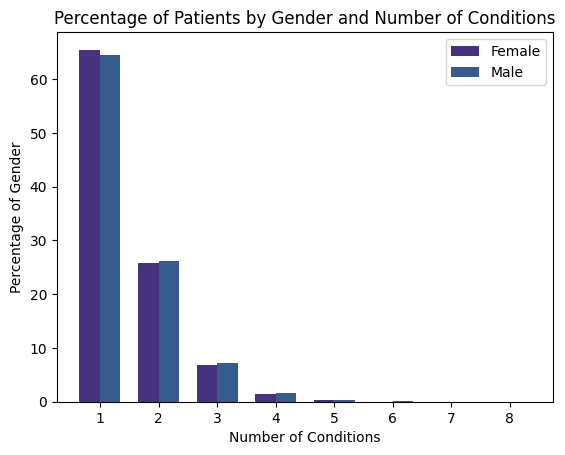

In [33]:
# Calculate the total number of male and female patients
total_males = df[df['Patient Gender'] == 'M'].shape[0]
total_females = df[df['Patient Gender'] == 'F'].shape[0]

# Group by 'Patient Gender' and 'Num Conditions' and count the number of patients
gender_conditions = df.groupby(['Patient Gender', 'Num Conditions']).size().unstack()

# Calculate the percentage of male and female patients with each number of conditions
gender_conditions.loc['M'] = gender_conditions.loc['M'] / total_males * 100
gender_conditions.loc['F'] = gender_conditions.loc['F'] / total_females * 100

# Create an index for each group
bar_width = 0.35
index = np.arange(len(gender_conditions.columns))

# Create a bar chart
fig, ax = plt.subplots()

bar1 = ax.bar(index, gender_conditions.loc['F'], bar_width, label='Female')
bar2 = ax.bar(index + bar_width, gender_conditions.loc['M'], bar_width, label='Male')

# Set the plot title and labels
ax.set_xlabel('Number of Conditions')
ax.set_ylabel('Percentage of Gender')
ax.set_title('Percentage of Patients by Gender and Number of Conditions')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(gender_conditions.columns)
ax.legend()

# Show the plot
plt.show()

The percentage of genders appears similar across all numbers of conditions.

# Multiple conditions

For each condition we can see the proportion of people who have just that condition or have it with another co-morbidity, we can see how that changes with age.

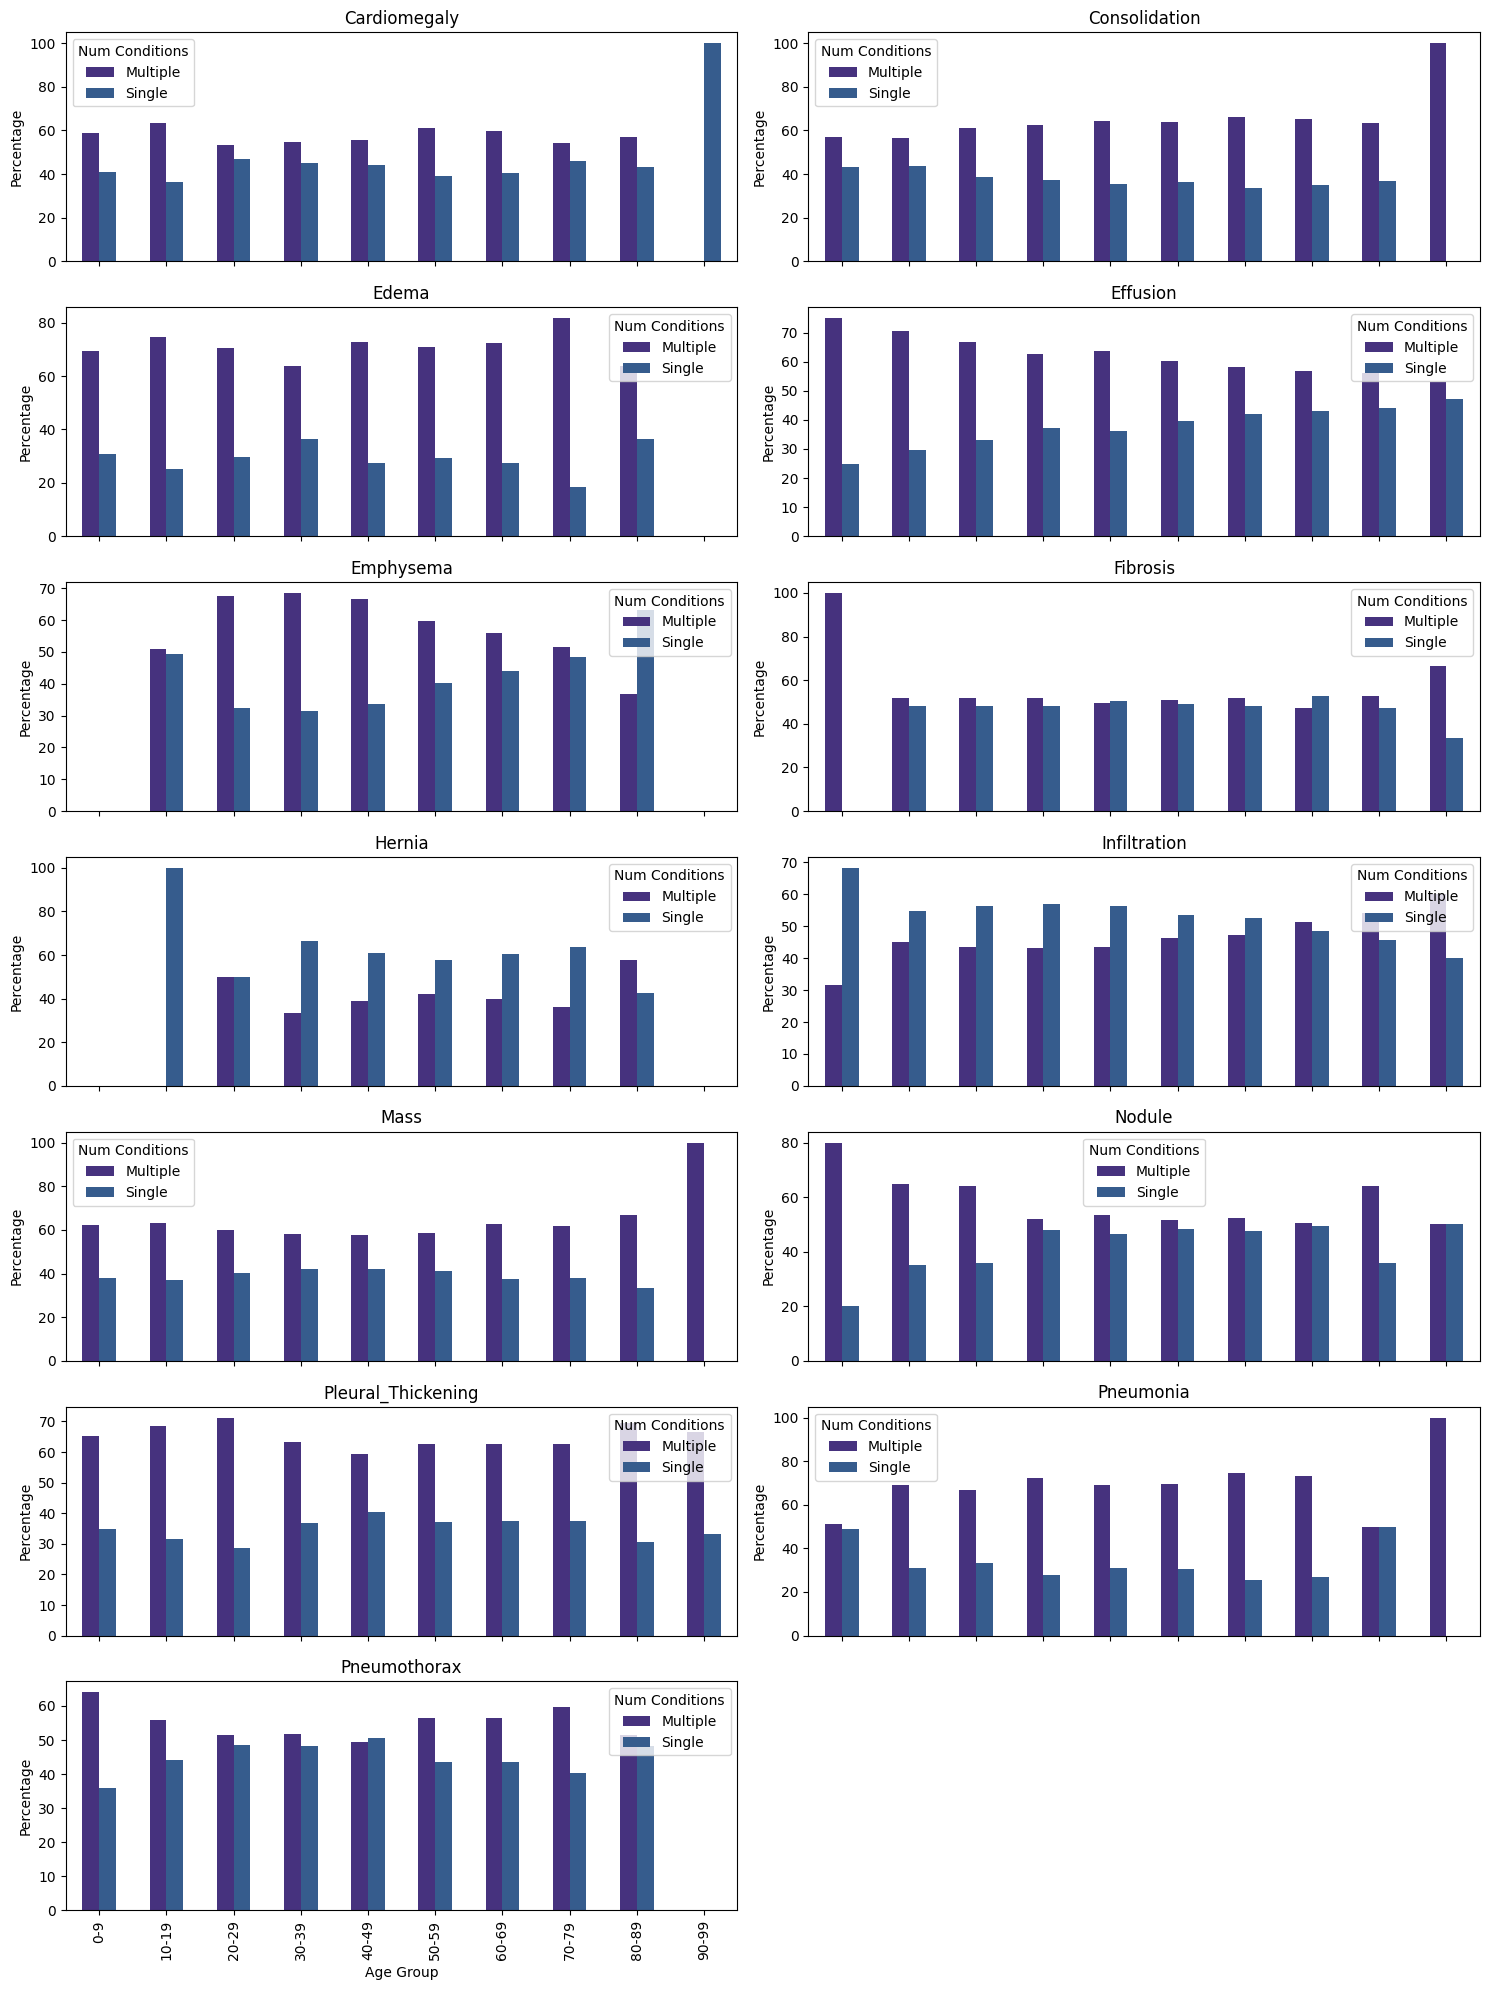

In [34]:
num_rows = len(conditions_list) // 2 if len(conditions_list) % 2 == 0 else len(conditions_list) // 2 + 1

fig, axes = plt.subplots(num_rows, 2, sharex=True, figsize=(15, 20))

# Define 'Num Conditions' labels outside the loop
num_conditions_label = df['Num Conditions'].apply(lambda x: 'Single' if x == 1 else 'Multiple')

for idx, condition in enumerate(conditions_list):
    # Create a new DataFrame with percentages for 'Single' and 'Multiple' conditions for 'cardiomegaly'
    percentages_df = df[df[condition] == 1].groupby(['Age Group', num_conditions_label]).size().unstack()

    # Normalize each row to get percentages within each age group
    percentages_df = percentages_df.div(percentages_df.sum(axis=1), axis=0) * 100

    # Plot the bar chart
    percentages_df.plot(kind='bar', ax=axes[idx // 2, idx % 2], title=condition)
    axes[idx // 2, idx % 2].set_ylabel('Percentage')

# Remove the last empty subplot if the number of conditions is odd
if len(conditions_list) % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

**Correlations between multiple conditions**

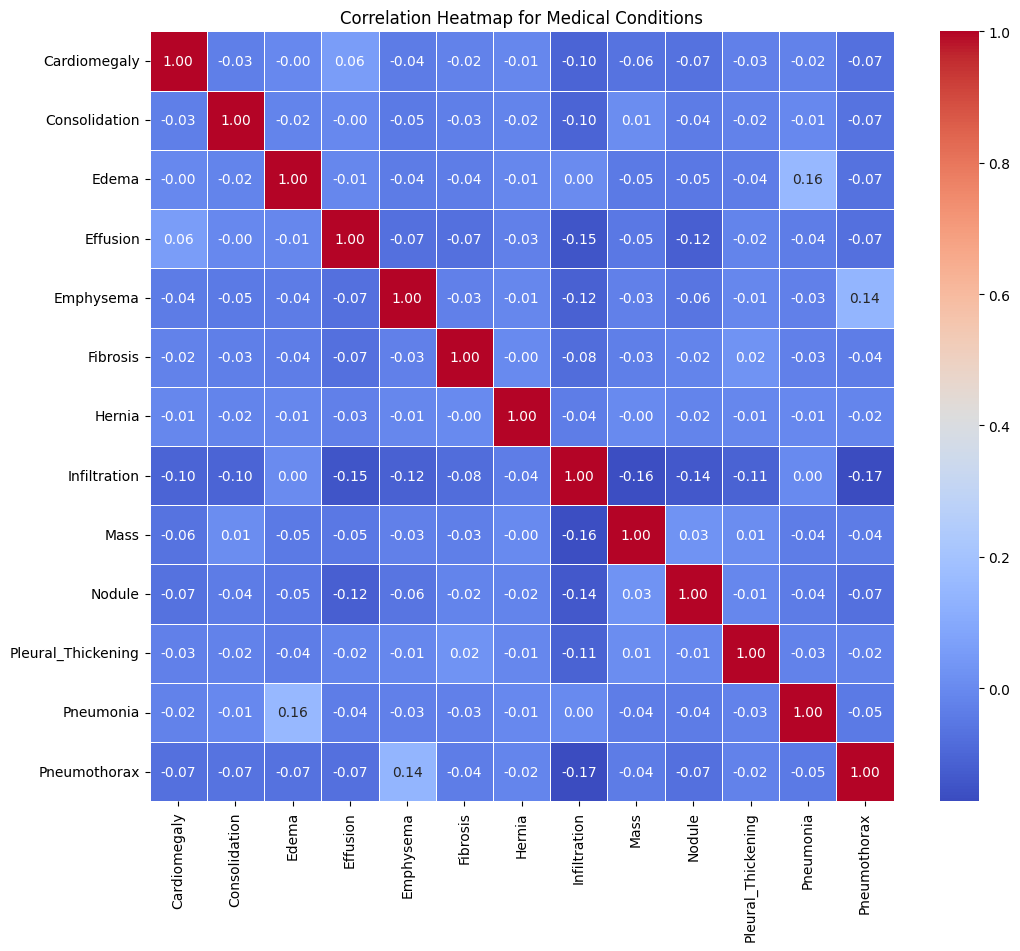

In [35]:
conditions_df = df[conditions_list]

# Calculate the correlation matrix
correlation_matrix = conditions_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for Medical Conditions')
plt.show()

The conditions do not appear to be strongly correlated with each other i.e. no two conditions move in lock step with each other.

It's important to note that correlation does not imply causation. Weak correlations do not necessarily mean that there is no relationship between the conditions; it indicates a lack of linear relationship.

**Relative correlation**

Below we will compare just how much each condition show up with another condition in comparison with each other i.e. whenever condition **x** appears with something else what is the likelihood it appears with condition **y**.

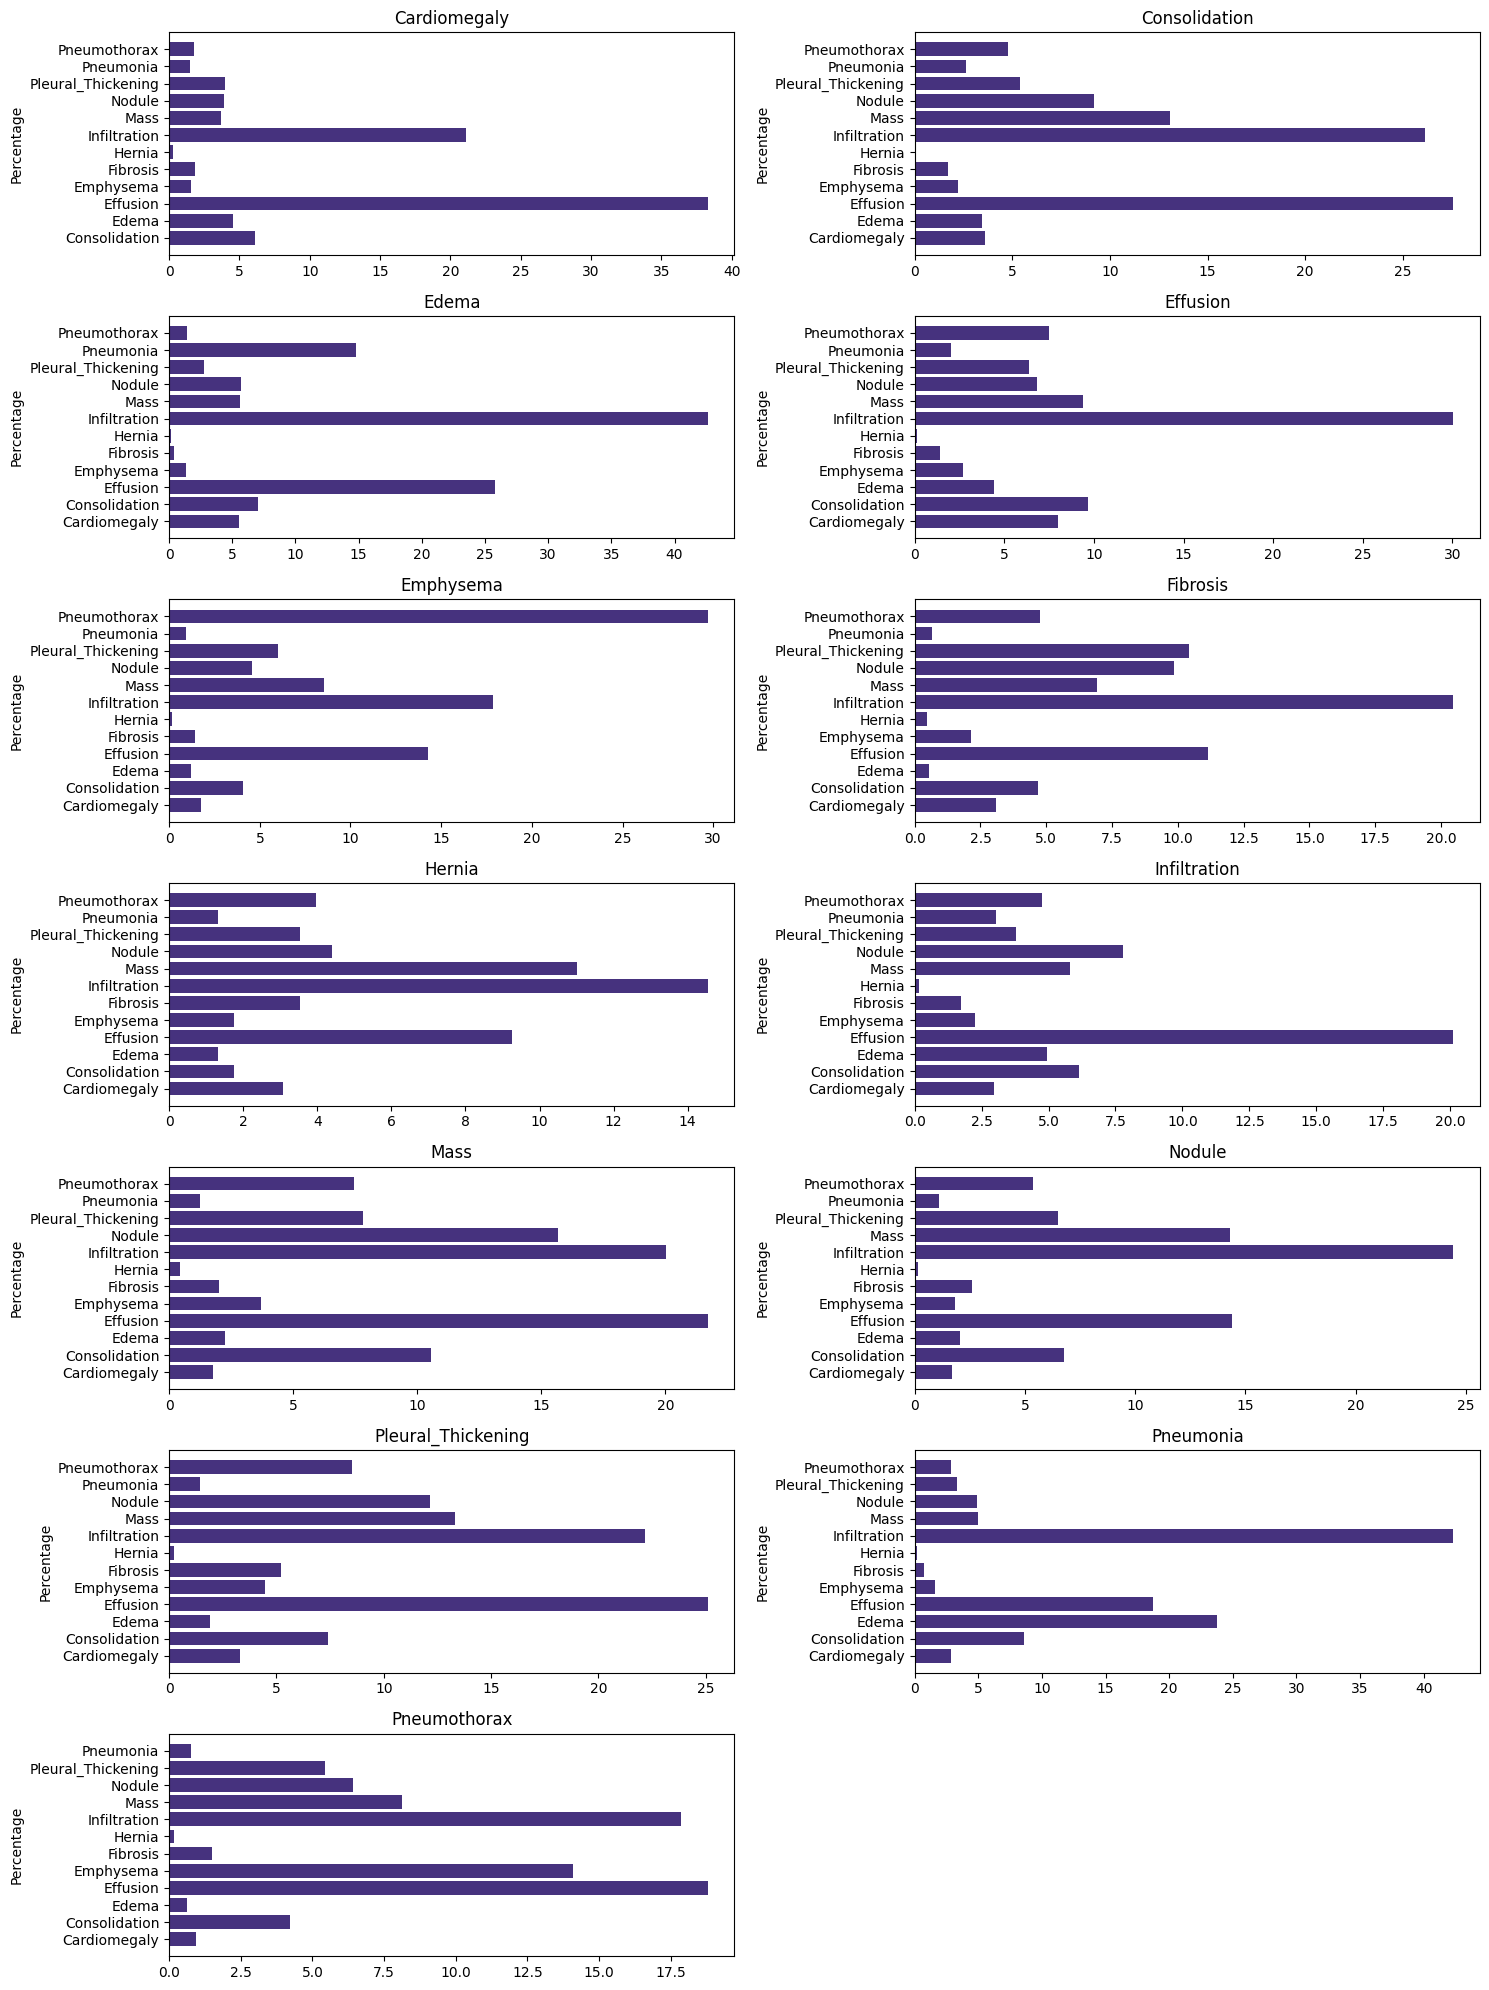

In [36]:
conditions_list = ['Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']

# Calculate the number of rows for the subplots
num_rows = len(conditions_list) // 2 if len(conditions_list) % 2 == 0 else len(conditions_list) // 2 + 1

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 20))

for idx, condition in enumerate(conditions_list):
    # Create a new DataFrame with percentages for each condition
    percentages = []
    other_conditions = [pathology for pathology in conditions_list if pathology != condition]
    for pathology in other_conditions:
        total = df[df[condition] == 1].shape[0]
        co_occurrence = df[(df[condition] == 1) & (df[pathology] == 1)].shape[0]
        percentage = (co_occurrence / total) * 100
        percentages.append(percentage)
    
    # Plot the bar chart
    axes[idx // 2, idx % 2].barh(other_conditions, percentages)
    axes[idx // 2, idx % 2].set_title(condition)
    axes[idx // 2, idx % 2].set_ylabel('Percentage')

# Remove the last empty subplot if the number of conditions is odd
if len(conditions_list) % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

We can see that whenever a patient has multiple conditions, some conditions are more likely to appear together. We can appreciate that in the correlation map below.

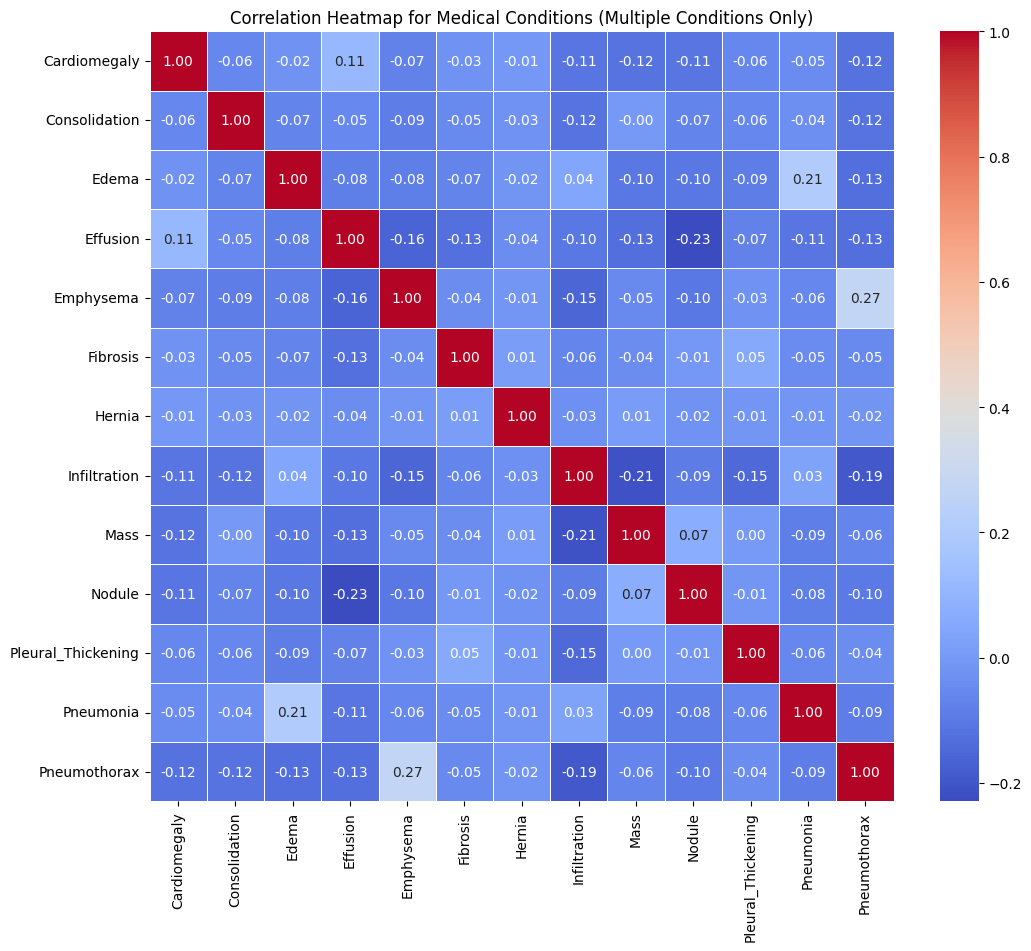

In [37]:
# Filter the DataFrame to include only rows where 'Num Conditions' is greater than 1
multiple_conditions_df = df[df['Num Conditions'] > 1][conditions_list]

# Calculate the correlation matrix for these rows
correlation_matrix_multiple = multiple_conditions_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_multiple, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for Medical Conditions (Multiple Conditions Only)')
plt.show()

**Follow up visits**

In [38]:
# Initialize an empty list to store the results
results = []

# Iterate over each condition
for condition in conditions_list:
    # Create a new DataFrame for the current condition
    condition_rows = df[df[condition] == 1].copy()

    # Calculate the number of patients
    num_patients = condition_rows['Patient ID'].nunique()

    # Calculate the total number of follow-ups
    total_follow_ups = condition_rows['Follow-up #'].sum()

    # Calculate the average number of follow-ups per patient
    avg_follow_ups = total_follow_ups / num_patients if num_patients > 0 else 0

    # Append the results to the list
    results.append([condition, num_patients, total_follow_ups, avg_follow_ups])

# Convert the results to a DataFrame
results_df = pd.DataFrame(results, columns=['Condition', 'Number of Patients', 'Total Follow-ups', 'Average Follow-ups'])

# Display the DataFrame
results_df.head(13)

,Condition,Number of Patients,Total Follow-ups,Average Follow-ups
0,Cardiomegaly,1566,30398,19.411239
1,Consolidation,2150,76215,35.448837
2,Edema,1072,36130,33.703358
3,Effusion,4275,180511,42.224795
4,Emphysema,1046,33752,32.267686
5,Fibrosis,1260,13165,10.448413
6,Hernia,134,798,5.955224
7,Infiltration,8033,262787,32.713432
8,Mass,2567,53703,20.920530
9,Nodule,3394,53604,15.793754


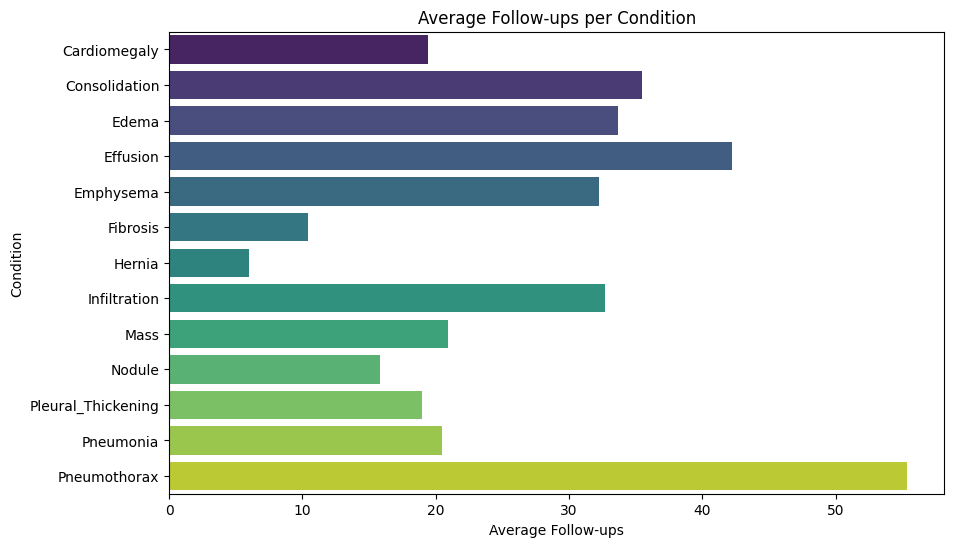

In [39]:
# List of conditions
conditions_list = df.columns[5:18]  # Update this as per your DataFrame

# Average follow-ups per condition
avg_follow_ups = [19.411239, 35.448837, 33.703358, 42.224795, 32.267686, 10.448413, 5.955224, 32.713432, 20.920530, 15.793754, 18.939182, 20.484127, 55.383322]

# Create a DataFrame
data = pd.DataFrame({
    'Condition': conditions_list,
    'Average Follow-ups': avg_follow_ups
})

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(y='Condition', x='Average Follow-ups', data=data, palette='viridis')
plt.title('Average Follow-ups per Condition')
plt.show()

Having an idea of the number of follow up visits required by a patient with a condition can help health care planners to anticipate future clinic demand based on the current health data.

# Thanks for reading